In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mongodb_dir = 'ycsb-mongodb-binding-0.17.0'
mongodb_results = {}
for case in 'abcdef':
    load_output, run_output = None, None
    with open('%s/outputLoad%s.txt' % (mongodb_dir, case)) as load_file:
        load_output = load_file.readlines()
    with open('%s/outputRun%s.txt' % (mongodb_dir, case)) as run_file:
        run_output = run_file.readlines()
    mongodb_results[case] = (load_output, run_output)
    
print(mongodb_results.keys())

dict_keys(['a', 'b', 'c', 'd', 'e', 'f'])


In [3]:
mongo_stats = {}
for case, (load_output, run_output) in mongodb_results.items():
    load_stats, run_stats = {}, {}
    print('Case %s have %d load output lines and %d run output lines' % (case, len(load_output), len(run_output)))
    for l in load_output:
        if len(l.strip().split(', ')) == 3:
            op, unit, value = l.strip().split(', ')
            op = op.replace('[', '').replace(']', '')
            if op not in load_stats:
                load_stats[op] = {}
            load_stats[op][unit] = value
    for l in run_output:
        if len(l.strip().split(', ')) == 3:
            op, unit, value = l.strip().split(', ')
            op = op.replace('[', '').replace(']', '')
            if op not in run_stats:
                run_stats[op] = {}
            run_stats[op][unit] = value
    print('Case %s parsed to %d load and %d run stats' % (case, len(load_stats), len(run_stats)))
    print('Case %s overal load runtime (ms): %s' % (case, load_stats['OVERALL']['RunTime(ms)']))
    print('Case %s overal run runtime (ms): %s' % (case, run_stats['OVERALL']['RunTime(ms)']))
    print('------------------------------------------------------------------------')
    mongo_stats[case] = load_stats, run_stats

Case a have 1043 load output lines and 1050 run output lines
Case a parsed to 183 load and 17 run stats
Case a overal load runtime (ms): 78
Case a overal run runtime (ms): 61
------------------------------------------------------------------------
Case b have 1043 load output lines and 1050 run output lines
Case b parsed to 177 load and 16 run stats
Case b overal load runtime (ms): 119
Case b overal run runtime (ms): 49
------------------------------------------------------------------------
Case c have 1043 load output lines and 1043 run output lines
Case c parsed to 167 load and 15 run stats
Case c overal load runtime (ms): 76
Case c overal run runtime (ms): 50
------------------------------------------------------------------------
Case d have 1043 load output lines and 1050 run output lines
Case d parsed to 177 load and 24 run stats
Case d overal load runtime (ms): 139
Case d overal run runtime (ms): 50
------------------------------------------------------------------------
Case e

In [4]:
postgres_dir = 'ycsb-postgrenosql-binding-0.17.0'
postgres_results = {}
for case in 'abcdef':
    load_output, run_output = None, None
    with open('%s/outputLoad%s.txt' % (postgres_dir, case)) as load_file:
        load_output = load_file.readlines()
    with open('%s/outputRun%s.txt' % (postgres_dir, case)) as run_file:
        run_output = run_file.readlines()
    postgres_results[case] = (load_output, run_output)
    
print(postgres_results.keys())

dict_keys(['a', 'b', 'c', 'd', 'e', 'f'])


In [5]:
postgres_stats = {}
for case, (load_output, run_output) in postgres_results.items():
    load_stats, run_stats = {}, {}
    print('Case %s have %d load output lines and %d run output lines' % (case, len(load_output), len(run_output)))
    for l in load_output:
        if len(l.strip().split(', ')) == 3:
            op, unit, value = l.strip().split(', ')
            op = op.replace('[', '').replace(']', '')
            if op not in load_stats:
                load_stats[op] = {}
            load_stats[op][unit] = value
    for l in run_output:
        if len(l.strip().split(', ')) == 3:
            op, unit, value = l.strip().split(', ')
            op = op.replace('[', '').replace(']', '')
            if op not in run_stats:
                run_stats[op] = {}
            run_stats[op][unit] = value
    print('Case %s parsed to %d load and %d run stats' % (case, len(load_stats), len(run_stats)))
    print('Case %s overal load runtime (ms): %s' % (case, load_stats['OVERALL']['RunTime(ms)']))
    print('Case %s overal run runtime (ms): %s' % (case, run_stats['OVERALL']['RunTime(ms)']))
    print('------------------------------------------------------------------------')
    postgres_stats[case] = load_stats, run_stats

Case a have 1043 load output lines and 1050 run output lines
Case a parsed to 184 load and 17 run stats
Case a overal load runtime (ms): 104
Case a overal run runtime (ms): 62
------------------------------------------------------------------------
Case b have 1043 load output lines and 1050 run output lines
Case b parsed to 184 load and 16 run stats
Case b overal load runtime (ms): 81
Case b overal run runtime (ms): 55
------------------------------------------------------------------------
Case c have 1043 load output lines and 1043 run output lines
Case c parsed to 162 load and 15 run stats
Case c overal load runtime (ms): 91
Case c overal run runtime (ms): 60
------------------------------------------------------------------------
Case d have 1043 load output lines and 1050 run output lines
Case d parsed to 166 load and 24 run stats
Case d overal load runtime (ms): 99
Case d overal run runtime (ms): 81
------------------------------------------------------------------------
Case e 

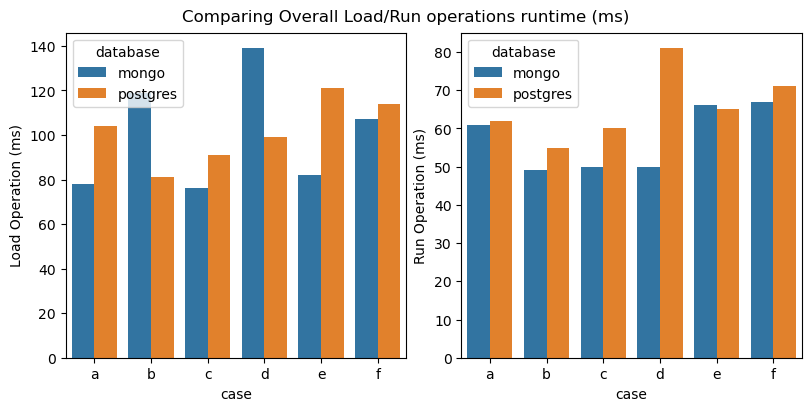

In [6]:
# Compare OVERALL Runtime
compare_data = []
compare_op, compare_stat, stat_type = 'OVERALL', 'RunTime(ms)', int
for case, (load_ops, run_ops) in mongo_stats.items():
    data = ['mongo', case,
            stat_type(load_ops[compare_op][compare_stat]),
            stat_type(run_ops[compare_op][compare_stat])]
    compare_data.append(data)

for case, (load_ops, run_ops) in postgres_stats.items():
    data = ['postgres', case,
            stat_type(load_ops[compare_op][compare_stat]),
            stat_type(run_ops[compare_op][compare_stat])]
    compare_data.append(data)

df = pd.DataFrame(compare_data, columns=['database', 'case', 'load_op', 'run_op'])
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8, 4), layout="constrained")
fig.suptitle('Comparing Overall Load/Run operations runtime (ms)')
ax1 = sns.barplot(df, x='case', y='load_op', hue='database', ax=axs[0])
ax1.set_ylabel('Load Operation (ms)')
ax2 = sns.barplot(df, x='case', y='run_op', hue='database', ax=axs[1])
ax2.set_ylabel('Run Operation (ms)')
plt.show()

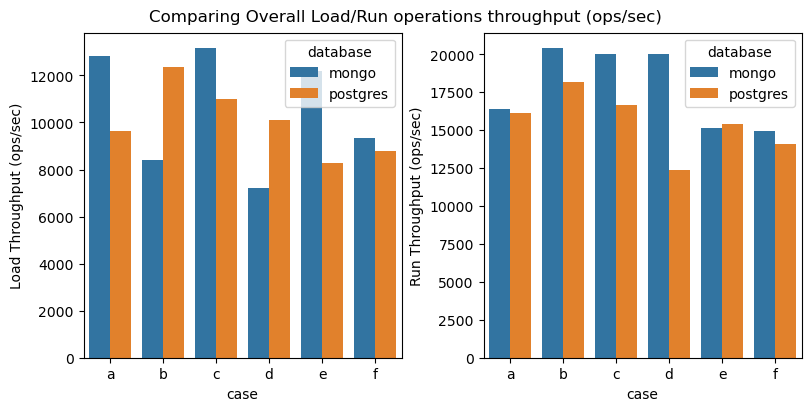

In [7]:
# Compare OVERALL Throughput
compare_data = []
compare_op, compare_stat, stat_type = 'OVERALL', 'Throughput(ops/sec)', float
for case, (load_ops, run_ops) in mongo_stats.items():
    data = ['mongo', case,
            stat_type(load_ops[compare_op][compare_stat]),
            stat_type(run_ops[compare_op][compare_stat])]
    compare_data.append(data)

for case, (load_ops, run_ops) in postgres_stats.items():
    data = ['postgres', case,
            stat_type(load_ops[compare_op][compare_stat]),
            stat_type(run_ops[compare_op][compare_stat])]
    compare_data.append(data)

df = pd.DataFrame(compare_data, columns=['database', 'case', 'load_op', 'run_op'])
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8, 4), layout="constrained")
fig.suptitle('Comparing Overall Load/Run operations throughput (ops/sec)')
ax1 = sns.barplot(df, x='case', y='load_op', hue='database', ax=axs[0])
ax1.set_ylabel('Load Throughput (ops/sec)')
ax2 = sns.barplot(df, x='case', y='run_op', hue='database', ax=axs[1])
ax2.set_ylabel('Run Throughput (ops/sec)')
plt.show()

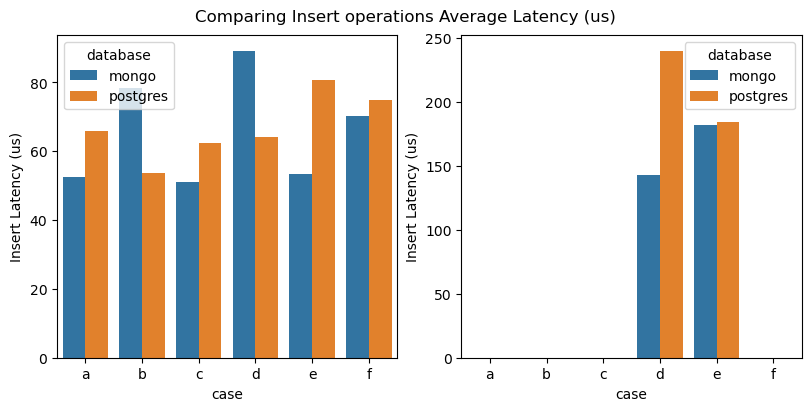

In [8]:
# Compare INSERT average latencies
compare_data = []
compare_op, compare_stat, stat_type = 'INSERT', 'AverageLatency(us)', float
for case, (load_ops, run_ops) in mongo_stats.items():
    data = ['mongo', case,
            stat_type(load_ops[compare_op][compare_stat]),
            stat_type(run_ops.get(compare_op, {}).get(compare_stat, 0))]
    compare_data.append(data)

for case, (load_ops, run_ops) in postgres_stats.items():
    data = ['postgres', case,
            stat_type(load_ops[compare_op][compare_stat]),
            stat_type(run_ops.get(compare_op, {}).get(compare_stat, 0))]
    compare_data.append(data)

df = pd.DataFrame(compare_data, columns=['database', 'case', 'load_op', 'run_op'])
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8, 4), layout="constrained")
fig.suptitle('Comparing Insert operations Average Latency (us)')
ax1 = sns.barplot(df, x='case', y='load_op', hue='database', ax=axs[0])
ax1.set_ylabel('Insert Latency (us)')
ax2 = sns.barplot(df, x='case', y='run_op', hue='database', ax=axs[1])
ax2.set_ylabel('Insert Latency (us)')
plt.show()

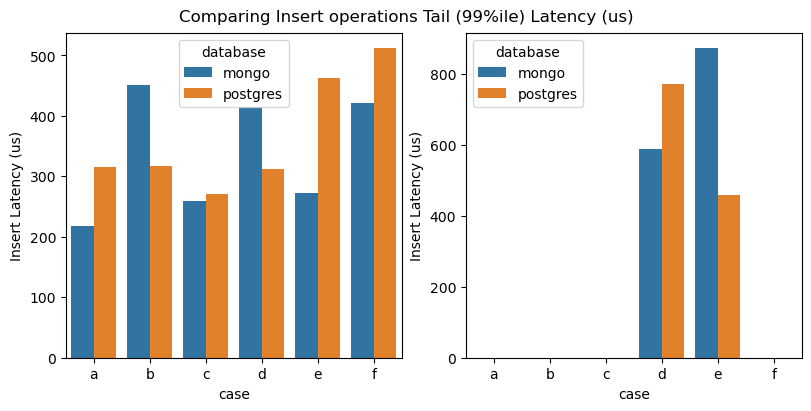

In [9]:
# Compare INSERT tail latencies
compare_data = []
compare_op, compare_stat, stat_type = 'INSERT', '99thPercentileLatency(us)', float
for case, (load_ops, run_ops) in mongo_stats.items():
    data = ['mongo', case,
            stat_type(load_ops[compare_op][compare_stat]),
            stat_type(run_ops.get(compare_op, {}).get(compare_stat, 0))]
    compare_data.append(data)

for case, (load_ops, run_ops) in postgres_stats.items():
    data = ['postgres', case,
            stat_type(load_ops[compare_op][compare_stat]),
            stat_type(run_ops.get(compare_op, {}).get(compare_stat, 0))]
    compare_data.append(data)

df = pd.DataFrame(compare_data, columns=['database', 'case', 'load_op', 'run_op'])
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8, 4), layout="constrained")
fig.suptitle('Comparing Insert operations Tail (99%ile) Latency (us)')
ax1 = sns.barplot(df, x='case', y='load_op', hue='database', ax=axs[0])
ax1.set_ylabel('Insert Latency (us)')
ax2 = sns.barplot(df, x='case', y='run_op', hue='database', ax=axs[1])
ax2.set_ylabel('Insert Latency (us)')
plt.show()

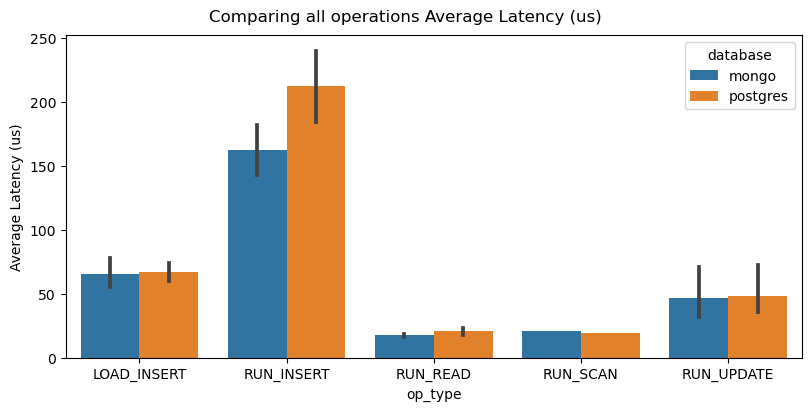

In [10]:
# Compare all operations
compare_data = []
compare_operations = [
    ('INSERT', 'AverageLatency(us)', float),
    ('READ', 'AverageLatency(us)', float),
    ('SCAN', 'AverageLatency(us)', float),
    ('UPDATE', 'AverageLatency(us)', float),
]
for compare_op, compare_stat, stat_type in compare_operations:
    for case, (load_ops, run_ops) in mongo_stats.items():
        if compare_op in load_ops:
            compare_data.append(['mongo', case, 'LOAD_%s' % compare_op, stat_type(load_ops[compare_op][compare_stat])])
        if compare_op in run_ops:
            compare_data.append(['mongo', case, 'RUN_%s' % compare_op, stat_type(run_ops[compare_op][compare_stat])])

    for case, (load_ops, run_ops) in postgres_stats.items():
        if compare_op in load_ops:
            compare_data.append(['postgres', case, 'LOAD_%s' % compare_op, stat_type(load_ops[compare_op][compare_stat])])
        if compare_op in run_ops:
            compare_data.append(['postgres', case, 'RUN_%s' % compare_op, stat_type(run_ops[compare_op][compare_stat])])

df = pd.DataFrame(compare_data, columns=['database', 'case', 'op_type', 'value'])
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(8, 4), layout="constrained")
fig.suptitle('Comparing all operations Average Latency (us)')
ax1 = sns.barplot(df, x='op_type', y='value', hue='database', ax=axs)
ax1.set_ylabel('Average Latency (us)')
plt.show()